In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
Xtrain = pd.read_csv("Xytrain_tree.csv").iloc[:, 2:]
ytrain = pd.read_csv("Xytrain_tree.csv").iloc[:, 1]

Xtest = pd.read_csv("Xytest_tree.csv").iloc[:, 2:]
ytest = pd.read_csv("Xytest_tree.csv").iloc[:, 1]

`DecisionTreeRegressor()`

In [31]:
# Define the DecisionTreeRegressor
dtree = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
param_grid_dtree = {
    'min_samples_leaf': range(1, 50),  # Minimum number of samples required to be at a leaf node
    'max_depth': range(1, 11),  # Maximum depth of the tree
    'max_features': range(1, 50),  # Number of features to consider for the best split
    'min_samples_split': range(2, 6)  # Minimum number of samples required to split a node
}

# Set up GridSearchCV for DecisionTreeRegressor
dtree_grid = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search model
dtree_grid.fit(Xtrain, ytrain)

# Print the best estimator found
print(f'Best estimator: {dtree_grid.best_estimator_}')

# Convert the GridSearchCV results to a DataFrame
df_dtree = pd.DataFrame(dtree_grid.cv_results_)

# Filter the results for max_features='sqrt', 'auto', etc. 
# Modify based on actual values from `param_max_features` in your data
df_filtered = df_dtree[df_dtree['param_max_features'].isin(['auto', 'sqrt', 'log2'])]

# Plot the results
fig, ax = plt.subplots(figsize=(6,4))
sns.lineplot(data=df_filtered, x='param_max_depth', y='mean_test_score', hue='param_max_features', ax=ax)

# Customize the plot
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Mean Test Accuracy')
ax.set_title('Impact of Max Depth and Max Features on DecisionTree Performance')

plt.show()

Fitting 5 folds for each of 96040 candidates, totalling 480200 fits


KeyboardInterrupt: 

`AdaBoostRegressor(DecisionTreeRegressor())`

In [ ]:
# Try to experiment with max_samples, max_features, number of modles, and other models
boosting = AdaBoostRegressor(DecisionTreeRegressor(), bootstrap=True, oob_score = True)

param_grid_boosting = {
    'n_estimators': range(1, 100),  # Number of trees in the ensemble
    'learning_rate': np.linspace(0, 1, 0.1),  # Fraction of samples to train each base estimator
    'loss': ["linear", 'square', "exponential"],  # Fraction of features to use for each base estimator
}

bagging_grid = GridSearchCV(estimator = boosting, param_grid = param_grid_boosting, cv = 5, verbose=2, n_jobs=-1)

# Fit the grid search model
bagging_grid.fit(Xtrain, ytrain)


print(f'best estimator: {bagging_grid.best_estimator_}')

`RandomForestRegressor()`

In [ ]:
# Make a randomforrest classifier. Try to experiment with criterion, number of estimators, max_depth, min_samples_leaf
rf = RandomForestRegressor(bootstrap=True, oob_score=True, criterion = 'gini',random_state=0)

# Define parameters to change and the values to try
n_estimators = range(5,101)
max_depth = range(1,11)
max_features = range(10,250,20)
min_samples_leaf = range(1, 11)

parameters = {
    "n_estimators" : n_estimators, # The number of trees in the forest.
    "max_depth": max_depth, #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    #"min_samples_leaf" : max_features,
    "max_features" : max_features

}

# use GridSearchCV to find the best model
# I suggest using a very small grid as it takes a long time to run otherwise
# Try implementing a small grid and then use the attached results for the discusion

rf_grid = GridSearchCV(rf, parameters, cv=5, scoring='accuracy', n_jobs=-1)


# Fit the grid search model
rf_grid.fit(Xtrain, ytrain)

#Save the results in a dataframe to disk
df = pd.DataFrame(rf_grid.cv_results_)
df.to_csv('CrossValidationResultsRandomForest.csv')

print(rf_grid.best_estimator_)

`BaggingRegressor(DecisionTreeRegressor())`

In [ ]:
# Try to experiment with max_samples, max_features, number of modles, and other models
bagging = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, oob_score = True)

param_grid_bagging = {
    'n_estimators': [10, 50, 100],  # Number of trees in the ensemble
    'max_samples': [0.8, 1.0],  # Fraction of samples to train each base estimator
    'max_features': [0.8, 1.0],  # Fraction of features to use for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement
    'base_estimator__max_depth': [5, 10, 15],  # Max depth for individual trees
    'base_estimator__min_samples_leaf': [5, 10, 20],  # Min samples for leaf nodes in individual trees
}

bagging_grid = GridSearchCV(estimator = bagging, param_grid = param_grid_bagging, cv = 5, verbose=2, n_jobs=-1)

# Fit the grid search model
bagging_grid.fit(Xtrain, ytrain)

print(f'best estimator: {bagging_grid.best_estimator_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\osaul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\osaul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\osaul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 66, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\osaul\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
       

best estimator: BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 oob_score=True)


ValueError: x and y must have same first dimension, but have shapes (100,) and (24,)

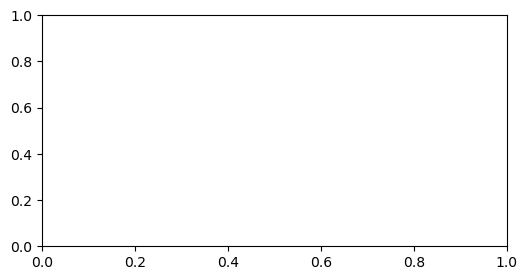

In [18]:
# --------------- Plots --------------- #
bagging_score = bagging_grid.cv_results_['mean_test_score']

plt.figure(figsize=(6, 3))
plt.plot(range(1,101), bagging_score, label='Bagging')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean accuracy')
plt.show()